**Main source https://musicinformationretrieval.com/**
**https://medium.com/@nitinsingh1789/spoken-digit-classification-b22d67fd24b0**

1. Spoken digit classification is generally a challenging task since the signals last for a short period and often some digits are acoustically very similar to each other.
2. The most important task for successfully classifying spoken digits is attribute extraction. 
3. Data consists of recordings of spoken digits in files at 8kHz. The recordings are trimmed so that they have near minimal silence at the beginnings and ends.
4. Read our dataset using the library “librosa”. Then extract STFT features from the audio. STFT (Short Term Fourier Transform) is a frequency feature representation for audio. STFT converts signals to obtain the amplitude of the given frequency at a given time. https://www.youtube.com/watch?v=g1_wcbGUcDY

** https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html **

5. Sound waves are digitized by sampling them at discrete intervals known as the sampling rate (typically 44.1kHz for CD-quality audio meaning samples are taken 44,100 times per second).Each sample is the amplitude of the wave at a particular time interval, where the bit depth determines how detailed the sample will be also known as the dynamic range of the signal (typically 16bit which means a sample can range from 65,536 amplitude values).
6. sampling is the reduction of a continuous signal into a series of discrete values. The sampling frequency or rate is the number of samples taken over some fixed amount of time. A high sampling frequency results in less information loss but higher computational expense, and low sampling frequencies have higher information loss but are fast and cheap to compute.
7. The sound excerpts are digital audio files in .wav format. other formats: wav (Waveform Audio File) format, mp3 (MPEG-1 Audio Layer 3) format, WMA (Windows Media Audio) format
8. Librosa: It is a Python module to analyze audio signals in general but geared more towards music. It includes the nuts and bolts to build a MIR(Music information retrieval) system. 
9. IPython.display.Audio: lets you play audio directly in a jupyter notebook.
10. A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Displays more or less energy at, for example, 2 Hz vs 10 Hz, and how energy levels vary over time. librosa.display.specshow.
11. The spectral features (frequency-based features), which are obtained by converting the time-based signal into the frequency domain using the Fourier Transform, like fundamental frequency, frequency components, spectral centroid, spectral flux, spectral density, spectral roll-off, etc.
12. The spectral centroid indicates at which frequency the energy of a spectrum is centered upon or in other words It indicates where the ” center of mass” for a sound is located.  librosa.feature.spectral_centroid computes the spectral centroid for each frame in a signal

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import os 
import librosa.display
import IPython.display as ipd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [34]:
# import dataset
BASE_DIR = os.getcwd()
data_DIR = os.path.join(BASE_DIR, "recordings/")

file = os.listdir(data_DIR)
data=[]
for i in file:
    print(i)
    x , sr = librosa.load(data_DIR+i)
    data.append(x)

5_nicolas_9.wav
3_yweweler_14.wav
1_lucas_5.wav
2_george_44.wav
4_yweweler_38.wav
3_yweweler_28.wav
4_yweweler_10.wav
3_george_1.wav
1_nicolas_15.wav
1_jackson_42.wav
0_theo_46.wav
6_lucas_9.wav
5_nicolas_48.wav
9_jackson_43.wav
9_nicolas_14.wav
4_nicolas_7.wav
1_nicolas_29.wav
4_jackson_0.wav
1_lucas_43.wav
5_jackson_23.wav
7_george_9.wav
9_nicolas_28.wav
5_jackson_37.wav
2_jackson_20.wav
2_jackson_34.wav
7_yweweler_41.wav
4_theo_11.wav
7_nicolas_2.wav
6_jackson_41.wav
6_nicolas_16.wav
9_lucas_17.wav
4_theo_39.wav
9_theo_45.wav
7_jackson_5.wav
9_yweweler_32.wav
9_yweweler_26.wav
7_theo_5.wav
6_yweweler_8.wav
4_george_1.wav
0_yweweler_45.wav
1_george_41.wav
6_lucas_43.wav
3_theo_35.wav
0_george_9.wav
8_lucas_6.wav
3_theo_21.wav
6_george_45.wav
6_theo_30.wav
1_nicolas_8.wav
6_theo_24.wav
5_yweweler_49.wav
2_george_6.wav
8_george_37.wav
8_george_23.wav
6_theo_18.wav
4_jackson_33.wav
0_nicolas_6.wav
0_nicolas_39.wav
9_george_11.wav
1_theo_28.wav
4_jackson_27.wav
8_nicolas_38.wav
8_nicolas

In [25]:
print(data[10])

[ 5.0540199e-04  5.5196765e-04  5.3555705e-04 ... -1.0266934e-04
 -1.7031807e-05  0.0000000e+00]


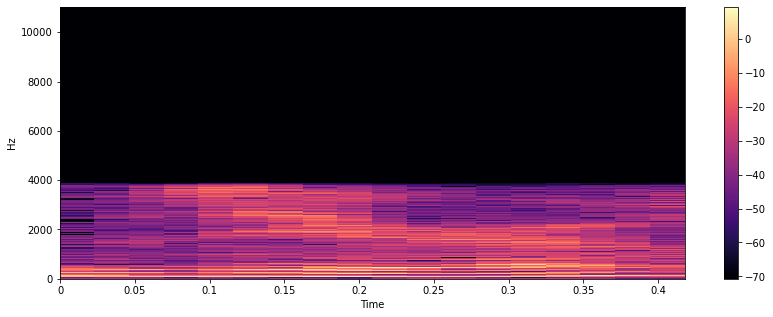

In [26]:
# Plot Frequency vs time

%matplotlib inline
X = librosa.stft(data[10]) # .stft() converts data into short term Fourier transform
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') #display spectogram
plt.colorbar()

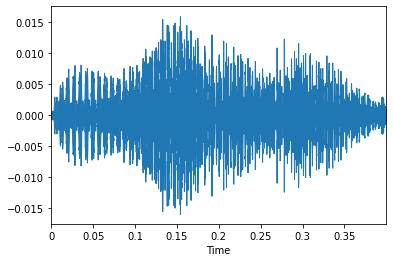

In [31]:
plt.figure()
librosa.display.waveplot(data[10], sr=sr)

In [35]:
data_DIR_play = os.path.join(BASE_DIR, "recordings/1_jackson_42.wav")

ipd.Audio(data_DIR_play, rate=sr)

In [48]:
data[10]

array([ 5.0540199e-04,  5.5196765e-04,  5.3555705e-04, ...,
       -1.0266934e-04, -1.7031807e-05,  0.0000000e+00], dtype=float32)

In [51]:
x =data[10]
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(18,)

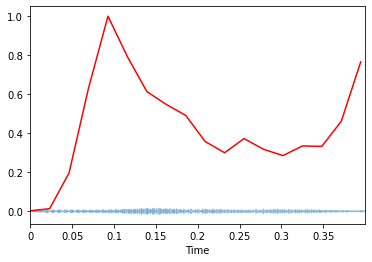

In [52]:
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r') # normalize for visualization purposes

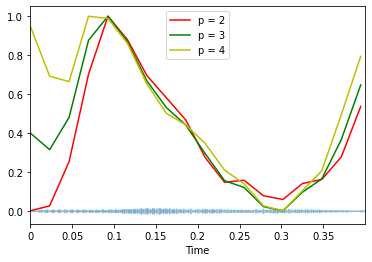

In [53]:
#Spectral bandwidth: 
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

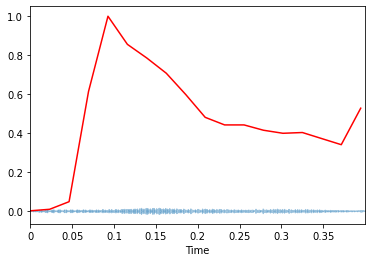

In [54]:
#Spectral Rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

In [8]:
# Input Signal to STFT features :

X=[]
for i in range(len(data)):
    X.append(abs(librosa.stft(data[i]).mean(axis = 1).T))
X= np.array(X)
print(X)

[[7.2570891e+00 3.6255779e+00 9.5188804e-03 ... 8.3274179e-05
  9.8089484e-05 9.1887508e-05]
 [6.1965748e-03 3.1007100e-03 3.7748480e-04 ... 2.1517390e-05
  3.5945755e-05 5.1154831e-05]
 [1.3355302e-02 6.8175243e-03 1.4788883e-03 ... 6.9021276e-06
  8.5705751e-06 3.0659228e-06]
 ...
 [5.8588423e-03 2.6368117e-03 3.6832230e-04 ... 4.0853465e-06
  4.7612457e-06 1.3673846e-06]
 [2.4785034e-02 1.2298853e-02 4.5043227e-04 ... 5.1760806e-05
  6.1965176e-05 5.2015617e-05]
 [6.7425124e-02 3.3805333e-02 5.2727904e-04 ... 6.4409592e-06
  7.0368305e-06 8.6972295e-06]]


In [9]:
# One hot Encoding:
y = [i[0] for i in file]
Y = pd.get_dummies(y)
print(Y)

      0  1  2  3  4  5  6  7  8  9
0     0  0  0  0  0  1  0  0  0  0
1     0  0  0  1  0  0  0  0  0  0
2     0  1  0  0  0  0  0  0  0  0
3     0  0  1  0  0  0  0  0  0  0
4     0  0  0  0  1  0  0  0  0  0
...  .. .. .. .. .. .. .. .. .. ..
2995  0  0  0  0  0  1  0  0  0  0
2996  0  0  0  1  0  0  0  0  0  0
2997  0  1  0  0  0  0  0  0  0  0
2998  0  0  1  0  0  0  0  0  0  0
2999  0  0  0  0  1  0  0  0  0  0

[3000 rows x 10 columns]


X contains the STFT features of each audio sample, where Y contain the target audio class label 

In [10]:
#Splitting Dataset:(75% training and 25% testing) into training and testing sets with STFT audio features as input, audio class as target label.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [11]:
#NN model 
model = Sequential()
model.add(Dense(256, activation='tanh', input_dim=1025))
model.add(Dense(128, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
history = model.fit(X_train, y_train, 
          epochs = 20,
          batch_size = 128, 
          verbose=1, 
          validation_data=(X_test, y_test),
          shuffle=True)
score = model.evaluate(X_test, y_test, batch_size=128)

Train on 2250 samples, validate on 750 samples
Epoch 1/20
2250/2250 [==============================] - 1s 363us/step - loss: 0.3249 - accuracy: 0.9000 - val_loss: 0.3139 - val_accuracy: 0.9000
Epoch 2/20
2250/2250 [==============================] - 0s 105us/step - loss: 0.3048 - accuracy: 0.9002 - val_loss: 0.2956 - val_accuracy: 0.9000
Epoch 3/20
2250/2250 [==============================] - 0s 108us/step - loss: 0.2871 - accuracy: 0.9012 - val_loss: 0.2808 - val_accuracy: 0.9013
Epoch 4/20
2250/2250 [==============================] - 0s 107us/step - loss: 0.2731 - accuracy: 0.9024 - val_loss: 0.2689 - val_accuracy: 0.9031
Epoch 5/20
2250/2250 [==============================] - 0s 108us/step - loss: 0.2619 - accuracy: 0.9038 - val_loss: 0.2589 - val_accuracy: 0.9039
Epoch 6/20
2250/2250 [==============================] - 0s 111us/step - loss: 0.2522 - accuracy: 0.9050 - val_loss: 0.2503 - val_accuracy: 0.9049
Epoch 7/20
2250/2250 [==============================] - 0s 120us/step - loss:

accuracy of 92.24%

Text(0, 0.5, 'accuracy')

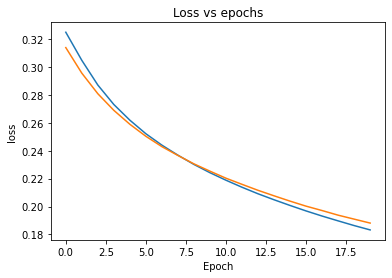

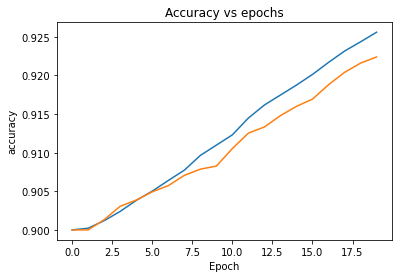

In [14]:
# Loss
plt.figure()
plt.title('Loss vs epochs')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')

# Accuracy
plt.figure()
plt.title('Accuracy vs epochs')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')

In [15]:
# RF
y=np.array(list(map(int,y)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
clf = RandomForestClassifier(n_estimators=200, max_depth=10)
clf = clf.fit(X_train, y_train)
Y_predict = clf.predict(X_test)
accuracy=accuracy_score(Y_predict,y_test)
print(accuracy)

0.8306666666666667


In [21]:
# Gradient Boosting
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=3, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train)
print("Learning rate: ", 0.5)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.5
Accuracy score (training): 0.721
Accuracy score (validation): 0.479


Gradient boosting is overfitting since Accuracy score (training): 0.721 and Accuracy score (validation): 0.479